In [ ]:
def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):
    val = (in_channels * kernel_size ** 2) * out_channels
    if bias: 
        val += out_channels
    return val

In [ ]:
count_parameters_conv(3,10,3,False)

270

In [ ]:
count_parameters_conv(3,10,3,True)

280

In [37]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from PIL import Image
from matplotlib import cm
from time import perf_counter
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm

warnings.filterwarnings('ignore')

plt.rc('font', size=30)

def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn) -> float:
    model.train()
    train_loss = 0
    for x, y in tqdm(data_loader, desc='Train'):
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)   
    return train_loss


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn):
    model.eval()
    total_loss = 0
    total = 0
    correct = 0
    for x, y in tqdm(data_loader, desc='Evaluation'):
        output = model(x)
        loss = loss_fn(output, y)
        total_loss += loss.item()
        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()
    total_loss /= len(data_loader)
    accuracy = correct / total

    return total_loss, accuracy

def plot_stats(
    train_loss,
    valid_loss,
    valid_accuracy,
    title
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

In [38]:
mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)

mnist_valid = MNIST(
    "../datasets/mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [39]:
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

In [42]:
mlp_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(mlp_model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

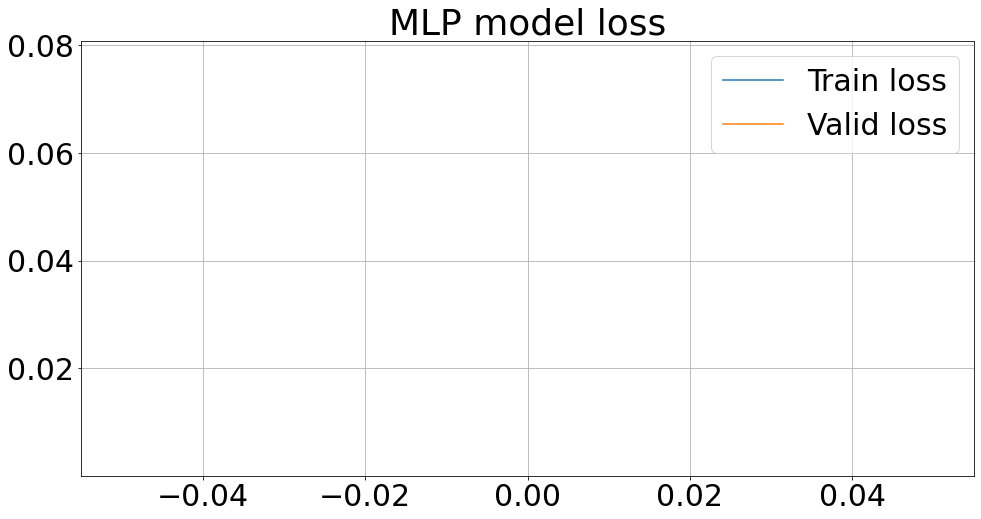

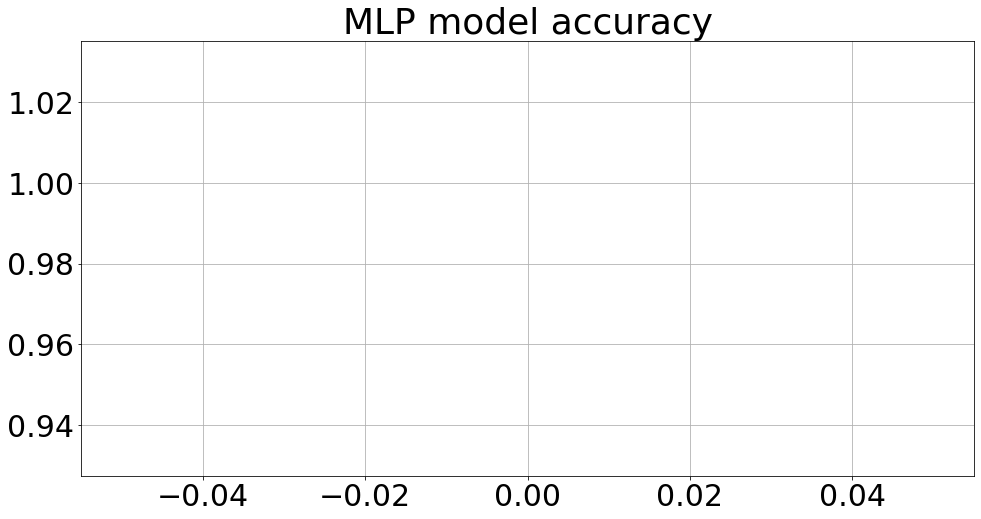

Total training and evaluation time 16.49189


In [44]:
num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(model=mlp_model, data_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn)

    valid_loss, valid_accuracy = evaluate(model=mlp_model, data_loader=valid_loader, loss_fn=loss_fn)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')
    if valid_accuracy > 0.98:
      break

print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [47]:
torch.save(mlp_model.state_dict(), 'weights.pt')

In [49]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

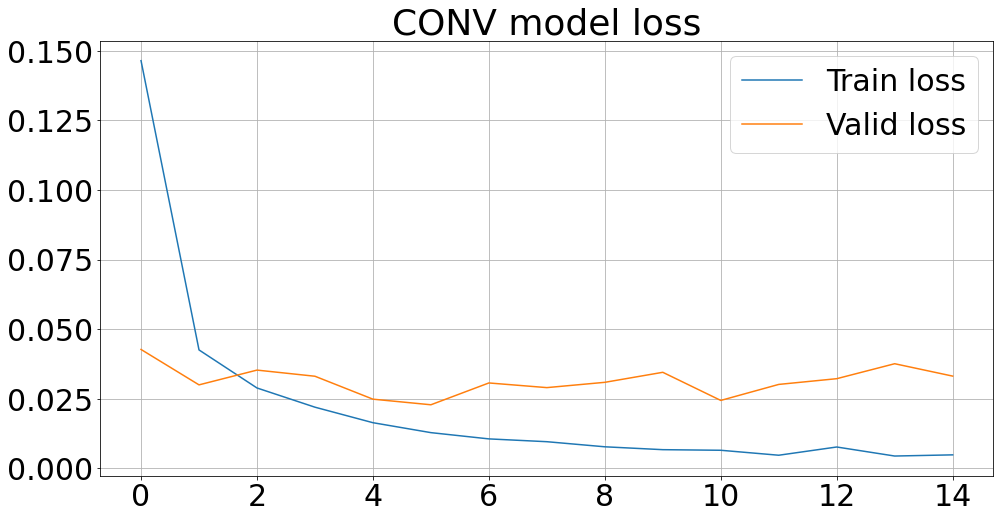

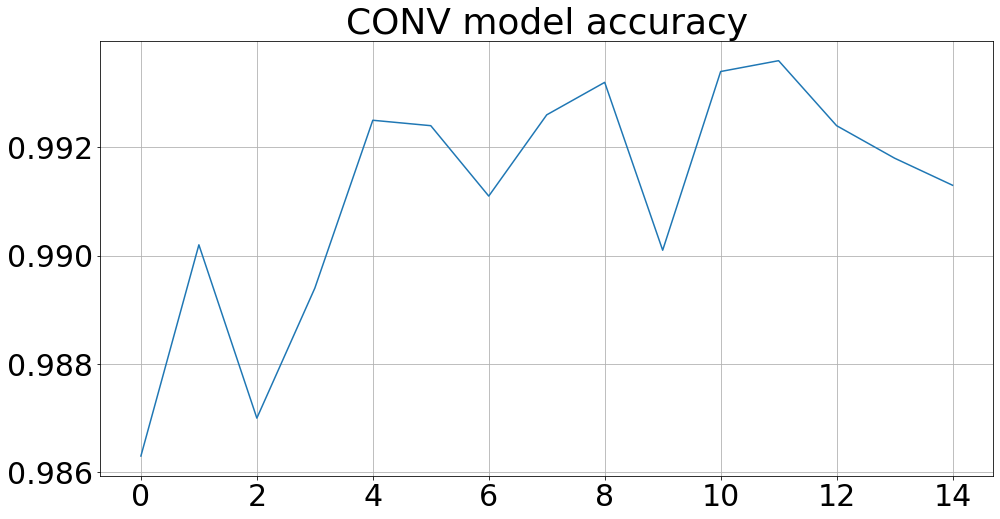

Total training and evaluation time 1133.96786


In [50]:
num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(model=model, data_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn)

    valid_loss, valid_accuracy = evaluate(model=model, data_loader=valid_loader, loss_fn=loss_fn)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'CONV model')

print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [16]:
torch.save(model.state_dict(), 'weights.pt')


In [17]:
def create_conv_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.Linear(4 * 4 * 64, 256),
        nn.ReLU(),
        nn.Linear(256, 10),
    )

    return model